# LAB7: Programowanie sieciowe – algorytmy CPM, PERT

# Zadanie 1
Realizacja algorytmu PERT:

In [14]:
#zestaw testowy 
inf = float('inf')
graph = {
    1 : [2,3],
    2: [4,5],
    3: [4],
    4: [5],
    5: [],
}
prevs = {
    1 : [],
    2: [1],
    3: [1],
    4: [2,3],
    5: [2,4],
}

a = [
    [inf, 13, 12, inf, inf],
    [inf, inf, inf, 2, 15],
    [inf, inf, inf, 8, inf],
    [inf, inf, inf, inf, 2],
    [inf, inf, inf, inf, inf],
    
]

def PERT(graph, a, prevs, s, l):
    """Algorytm PERT do wyznaczania ścieżki krytycznej, terminu realizacji, bez realizacji reideksacji
    
    :param graf graph w postaci listy sąsiedztwa
    :param lista list a zawierająca wartości krawędzi
    :param słownik poprzedników wierzchołka
    :param int s wierzchołek startowy
    :param int l wierzchołek końocwy
    
    :return zwraca ścieżkę krytyczną, termin realizacji, wczesne rozpoczęcie, późne zakończenie, późne rozpoczęcie,
    wczesne zakończenie, zapas całkowity oraz czas trwania czynności  
    """
    
    #inicalizacja słownikow na odpowiednie temriny zakonczen, rozpoczęć oraz zapasy
    Pw = {}
    Kp = {key: 100000 for key in list(graph.keys())[::-1]}
    Zc = {}
    
    #forward Pw - obliczenie najwczesniejszego rozpoczęcia
    for u in graph:
        if u != s:
            Pw[u] = max([Pw[v]+ a[v-1][u-1] for v in prevs[u]])
        else:
            Pw[u] = 0

    #backward Kp -  wsteczne obliczenie późnegoo zakończenia
    Kp[l] = Pw[l]
    for u in list(graph.keys())[::-1]:
        for v in prevs[u]:
            Kp[v] = min(Kp[v], Kp[u] - a[v-1][u-1])

    #obliczenie pozostałych terminów i zapasu za pomocą algorytmu BFS
    EST = {} #wczesne rozpoczęcie
    EFT = {} #wczesne zakończenie
    LST = {} #późne rozpoczęcie
    LFT = {} #późne zakończenie
    duration = {} #czasy trwania
    visited = []
    Q = [s]
    while Q:
        v = Q.pop(0)
        if v not in visited:
            visited.append(v)
            for u in graph[v]:
                duration[(v,u)] = a[v-1][u-1]
                EST[(v,u)] = Pw[v]
                LFT[(v,u)] = Kp[u]
                EFT[(v,u)] = EST[(v,u)] + duration[(v,u)] 
                LST[(v,u)] = LFT[(v,u)] - duration[(v,u)] 
                Zc[(v,u)] = LFT[(v,u)] - EFT[(v,u)]
                Q.append(u)
    
    #reconstruct critical paths
    Zc_c = Zc.copy()
    copied = Zc.copy()
    crit_path = []
    visited = []
    next = 1
    while copied:
        path = []
        Zc_c = copied.copy()
        for task in Zc_c:
            if Zc_c[task] == 0:
                if next not in visited and next == task[0]:   
                    path.append(task[0])
                    next = task[1]
                    copied.pop(task)
            else:
                copied.pop(task)
        path.append(next)
        if crit_path and path[0] == crit_path[0][-1]:
            crit_path[0].extend(path[1:])
            break
        elif crit_path:
            path.append(*crit_path[0][crit_path[0].index(next)+1:])
        crit_path.append(path)
        if copied:  
            next = list(copied.keys())[0][0]
    
    return crit_path, Kp[l], EST, LFT, EFT, LST, Zc, duration

crit_path, date, Pw, Kp, Kw, Pp, Zc, duration = PERT(graph, a, prevs, 1, 5)
print(crit_path)

[[1, 2, 5]]


### Przykład przedsięwzięcia na grafie 12 wierzchołków, 20 krawędzi
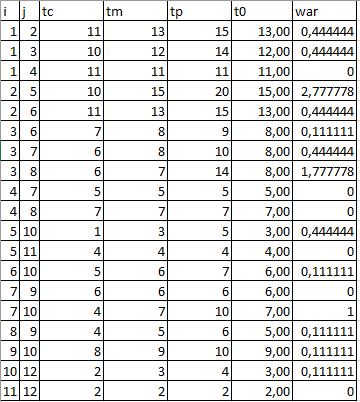

In [19]:
inf = float('inf')
graph = {
    1 : [2,3,4],
    2: [5,6],
    3: [6,7,8],
    4: [7,8],
    5: [10,11],
    6: [10],
    7: [9,10],
    8: [9],
    9: [10],
    10: [12],
    11: [12],
    12: []
}

a = [
    [inf, 13, 12, 11, inf,inf,inf,inf,inf,inf,inf,inf],
    [inf, inf, inf, inf, 15, 13,inf,inf,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,8,8,8,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,5,7,inf,inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,3,4,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,6,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,6,7,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,5, inf,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,9,inf,inf],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,3],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,2],
    [inf, inf, inf, inf, inf,inf,inf,inf,inf,inf,inf,inf],

    
]
prevs = {
    1 : [],
    2: [1],
    3: [1],
    4: [1],
    5: [2],
    6: [2,3],
    7: [3,4],
    8: [3,4],
    9: [7,8],
    10: [5,6,7,9],
    11: [5],
    12: [10,11]
}

crit_path, date, Pw, Kp, Kw, Pp, Zc, duration = PERT(graph, a, prevs, 1, 12)
print(f'Ścieżka krytyczna to: {crit_path} a termin realizacji to: {date} dni')

Ścieżka krytyczna to: [[1, 3, 7, 9, 10, 12]] a termin realizacji to: 38 dni


Na podstawie powyższej ścieżki krytycznej możliwe jest obliczenie wariancji:

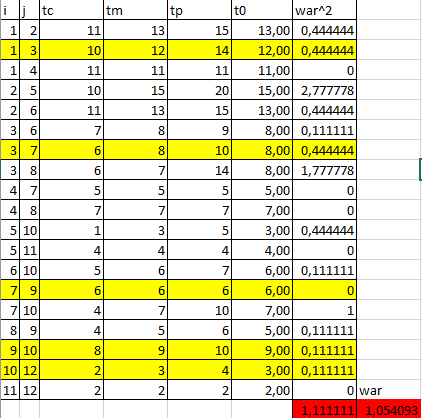

Dzięki temu możliwe było policzenie terminu realizacji z prawdopodobieństwem 0.9:

Z tablic wartość rozkładu dla P(td <= tr) = 0.9 to około X = 1,28. Przy wariancji 1,1111 możemy obliczyć termin:

1,28 = $\frac{t_d - 38}{\sqrt{1,111}}$

$t_d = 39,34$

czyli w 40 dni


# Wykres Gantt'a
Do sporządzenia wykresu została użyta biblioteka matplotlib oraz narzędzie w postaci funkcji stworzeonej przez Copyright (c) 2018 Vamsi Aribandi

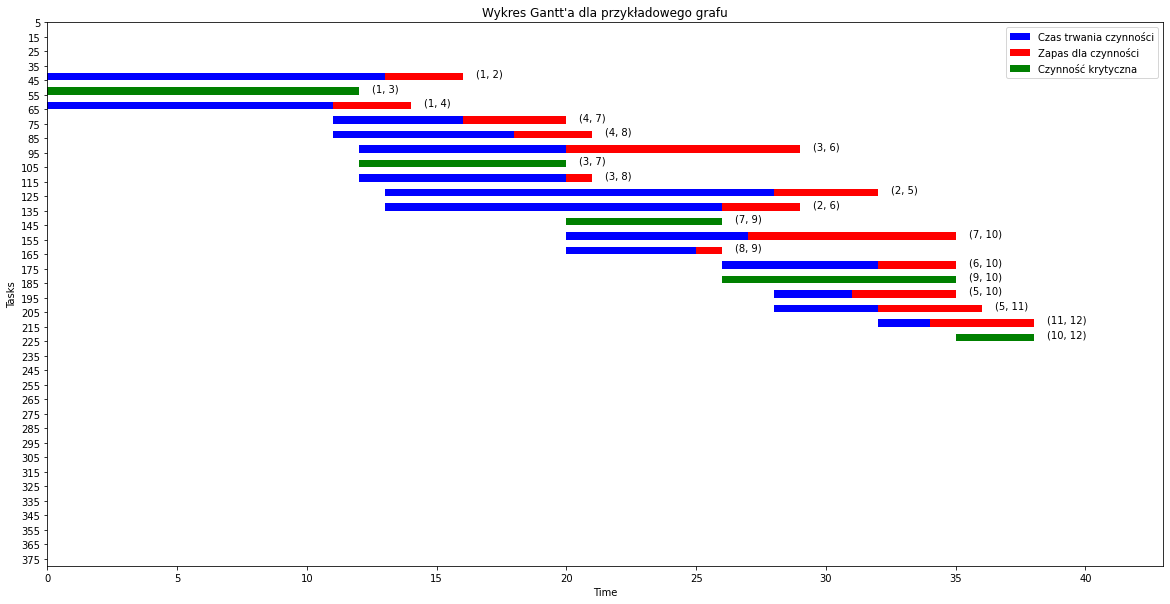

In [28]:
import matplotlib.pyplot as plt
def make_gantt_chart(graph, startTimes, completionTimes, durations, slackTimes):
    
    fig, ax = plt.subplots()
    fig.set_figwidth(20)
    fig.set_figheight(10)
    y_values = sorted(startTimes.keys(), key = lambda x: startTimes[x])
    y_start = 40
    y_height = 5
    for value in y_values:
        if slackTimes[value] == 0:
            facecolor1 = 'green'
            facecolor2 = 'green'
        else:
            facecolor1 = 'blue'
            facecolor2 = 'red'
        ax.broken_barh([(startTimes[value], durations[value])], (y_start, y_height), facecolors = facecolor1)
        ax.broken_barh([(completionTimes[value], slackTimes[value])], (y_start, y_height), facecolors = facecolor2)
        ax.text(completionTimes[value] + slackTimes[value] + 0.5,y_start + y_height/2, value)
        y_start += 10
    ax.set_xlim(0, max(completionTimes.values()) + 5)
    ax.set_ylim(len(durations)*20)
    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    ax.legend(['Czas trwania czynności', 'Zapas dla czynności', 'Czynność krytyczna'])
    ax.set_title("Wykres Gantt'a dla przykładowego grafu")
    i = 5
    y_ticks = []
    y_ticklabels = []
    while i < len(durations)*20:    
        y_ticks.append(i)
        i += 10
    ax.set_yticks(y_ticks)
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off
    plt.savefig('gantt.png', bbox_inches = 'tight')
    plt.show()
make_gantt_chart(graph, Pw, Kw, duration, Zc)

# Zadanie 2


Zadanie 2 zostało wykonane powyżej jako implementacja w Pythonie i z pomocą Excela do wyliczania wariancji.

# Zadanie 3

Zapas całkowity czasu dla danej czynności oznacza to o ile w podanym zakresie czasowym może się przesunąć rozpoczęcie danej czynności tak aby nie opóźniło to całkowitego terminu ralizacji projektu. Na wykresie może być zilustrowany np. innym kolorem jako przedłużenie danej czynności, wtedy jego koniec oznacza najpóźniejszy możliwy termin realizacji danego zadania, w powyższym przypadku kolor czerwony.